In [21]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from helper_functions import test_bot
from test_bots import play_bots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from bot_random import RandomBot
from mcts_bot import MCTSBot
from bot_humanlike import HumanLikeBot
bots = [RandomBot, HumanLikeBot, MCTSBot]

In [23]:
bot_test_dict = {bot.__name__: bot for bot in bots}
for bot in bots:
    n = 1000
    if bot == MCTSBot:
        n = 100
    print(bot.__name__)
    total_moves, mean, median, max_, min_, std, avg_hits_at_move, avg_moves_for_hit = test_bot(Bot=bot, n=n)
    
    bot_test_dict[bot.__name__] = {
        "total_moves": total_moves,
        "mean": mean,
        "median": median,
        "max": max_,
        "min": min_,
        "std": std,
        "avg_hits_at_move": avg_hits_at_move,
        "avg_moves_for_hit": avg_moves_for_hit
    } 
    
    print("Mean", bot_test_dict[bot.__name__]["mean"])
    print("Median", bot_test_dict[bot.__name__]["median"])
    print("Max", bot_test_dict[bot.__name__]["max"])
    print("Min", bot_test_dict[bot.__name__]["min"])
    print("Std", bot_test_dict[bot.__name__]["std"])
    print("-----------------")

RandomBot


100%|██████████| 1000/1000 [00:08<00:00, 119.59it/s]


Mean 95.417
Median 97.0
Max 100
Min 69
Std 4.8941915573463195
-----------------
HumanLikeBot


100%|██████████| 1000/1000 [00:04<00:00, 204.06it/s]


Mean 77.292
Median 80.0
Max 100
Min 35
Std 14.611732819895114
-----------------
MCTSBot


  1%|          | 1/100 [00:17<29:13, 17.71s/it]


KeyboardInterrupt: 

TypeError: 'type' object is not subscriptable

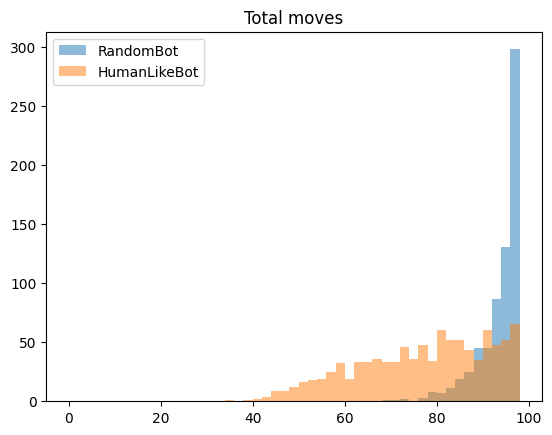

In [25]:
for bot in bots:
    plt.hist(bot_test_dict[bot.__name__]["total_moves"], bins=range(0, 100, 2), alpha=0.5, label=bot.__name__)
    plt.title("Total moves")
    plt.legend()

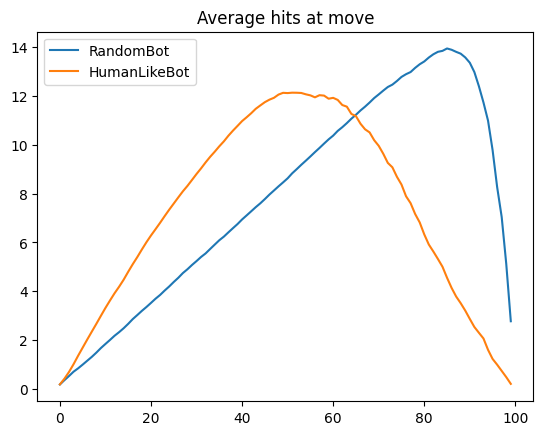

In [14]:
for bot in bots:
    plt.plot(bot_test_dict[bot.__name__]["avg_hits_at_move"], label=bot.__name__)
    plt.title("Average hits at move")
    plt.legend()

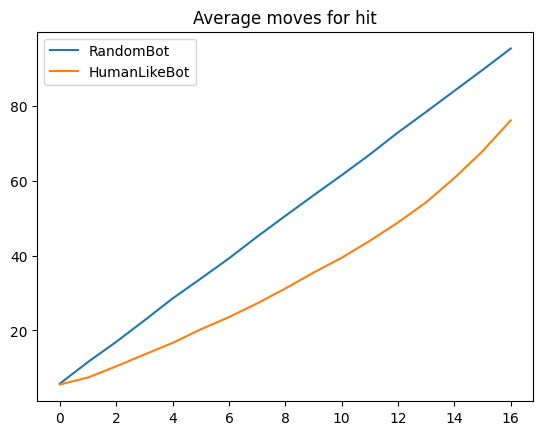

In [15]:
for bot in bots:
    plt.plot(bot_test_dict[bot.__name__]["avg_moves_for_hit"], label=bot.__name__)
    plt.title("Average moves for hit")
    plt.legend()

In [16]:
#Bot vs Bots

for bot in bots:
    #play every bot that is next in the list
    for bot2 in bots[bots.index(bot)+1:]:
        print("Playing", bot.__name__, "vs", bot2.__name__)
        n = 1000
        if bot == MCTSBot or bot2 == MCTSBot:
            n = 100
        print(bot.__name__, "vs", bot2.__name__)
        results = play_bots(bot, bot2, n=n)
        print(bot.__name__,"wins", results["bot1_wins"], results["bot1_wins"]/n)
        print(bot2.__name__,"wins", results["bot2_wins"], results["bot2_wins"]/n)
        print(bot.__name__, "avg moves", results["bot1_win_avg_moves"])
        print(bot2.__name__, "avg moves", results["bot2_win_avg_moves"])
        print("-----------------")

Playing RandomBot vs HumanLikeBot
RandomBot vs HumanLikeBot


100%|██████████| 1000/1000 [00:08<00:00, 123.86it/s]

RandomBot wins 109 0.109
HumanLikeBot wins 891 0.891
RandomBot avg moves 90.86238532110092
HumanLikeBot avg moves 74.51964085297419
-----------------
